# Exploratory Regression Analysis

In [5]:
import os
import pandas as pd
from package_models.regression_by_segment import perform_regression_analysis

current_directory = os.path.dirname(os.getcwd())
print(current_directory)

data = os.path.join(current_directory, '01-data', 'TAM_DEF.xlsx')
summary = os.path.join(current_directory, '04-summary')

perform_regression_analysis(
    segment_results='Y',
    segmentation_column="Generation",
    filter_column=None,
    filter_values=None,
    y_column='Yvar_USE_AI_Work',
    excel_path = data,
    summary_dir = summary
)


/Users/danramirez/mbs-structural-equation-modeling
Dataset loaded successfully.
Found Generation segments: ['Boomer' 'Gen Z' 'Gen X' 'Millennial']
Summary statistics and regression results saved to /Users/danramirez/mbs-structural-equation-modeling/04-summary/Regression_Results_Generation_Detailed.xlsx.


# Custom X variable List— Exploratory Regresson Models

In [4]:

import os
import pandas as pd
from package_models.custom_var_regression import custx_regression_analysis

custx_regression_analysis(
    segment_results='Y',
    segmentation_column='Generation',
    filter_column=None,
    filter_values=[None],
    pvalue_threshold=0.05,
    y_column='Yvar_USE_AI_Work',
    x_column_prefixes=['VAR'],  # Automatically include all columns starting with "VAR"
    output_filename_template='Custom_Regression_Results_{segmentation_column}.xlsx'
)


Excel file path: /Users/danramirez/mbs-structural-equation-modeling/01-data/TAM_DEF.xlsx
Summary directory: /Users/danramirez/mbs-structural-equation-modeling/04-summary
Dataset loaded successfully.
Columns in the dataset: ['ResponseId', 'Wave', 'region', 'Country', 'Generation', 'CS_experience_rollup', 'Roles', 'VAR01_CG_Training', 'VAR02_CG_AI_Training_Opo', 'VAR03_CG_AI_Training_Access', 'VAR04_CG_AI_Training_helps_skills', 'VAR05_CG_AI_Training_Supported', 'VAR06_ED_AI_Training_needed', 'VAR07_JOB_Postive_Import', 'VAR08_JOB_Enchance_Job_Security', 'VAR09_WORKFORCE_AI_Job_loss', 'VAR10_WORKFORCE_AI_Increase_Opportunity_Growth', 'VAR11_PRIVACY_AI_Protect_Data', 'VAR12_PRIVACY_AI_Give_Consent_Data_Usage', 'VAR13_PRIVACY_AI_Protect_Use_Data_Responsibly', 'VAR14_SAFETY_AI_Need_Protocols', 'VAR15_SAFETY_AI_protect_Cyber_Threats', 'VAR16_ETHICS_AI_Developed_Ethical', 'VAR17_ETHICS_AI_proritize_Human_Wellbeing', 'VAR18_GOV_Strict_AI_rules_Usage', 'VAR19_ACCOUNTABILITY_AI_Mechanisms', 'VAR

# Model and Hypothesis Diagram

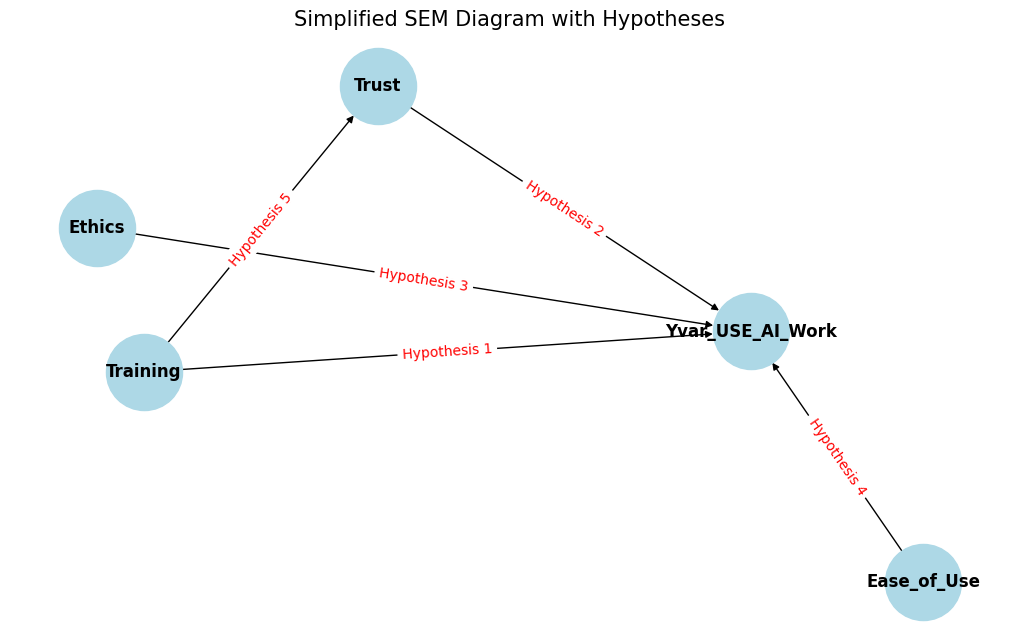

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a simplified version of the SEM with hypothesis labels

# Define the hypotheses and their corresponding edges
hypotheses = {
    'Hypothesis 1': ('Training', 'Yvar_USE_AI_Work'),
    'Hypothesis 2': ('Trust', 'Yvar_USE_AI_Work'),
    'Hypothesis 3': ('Ethics', 'Yvar_USE_AI_Work'),
    'Hypothesis 4': ('Ease_of_Use', 'Yvar_USE_AI_Work'),
    'Hypothesis 5': ('Training', 'Trust')
}

# Create the simplified SEM graph
G_hypotheses = nx.DiGraph()

# Add latent variables and edges for hypotheses
G_hypotheses.add_nodes_from(latent_variables)
for label, (source, target) in hypotheses.items():
    G_hypotheses.add_edge(source, target, label=label)

# Draw the graph with hypothesis labels
pos = nx.spring_layout(G_hypotheses, seed=42)

plt.figure(figsize=(10, 6))
nx.draw(G_hypotheses, pos, with_labels=True, node_color="lightblue", node_size=3000, font_size=12, font_weight="bold", arrows=True)

# Draw edge labels with the hypothesis labels
edge_labels = nx.get_edge_attributes(G_hypotheses, 'label')
nx.draw_networkx_edge_labels(G_hypotheses, pos, edge_labels=edge_labels, font_color='red', font_size=10)

plt.title("Simplified SEM Diagram with Hypotheses", size=15)
plt.show()


# SEM

Dataset loaded successfully.
Segments identified: ['Boomer' 'Gen Z' 'Gen X' 'Millennial']

Processing segment: Boomer


SEM model optimized for segment: Boomer


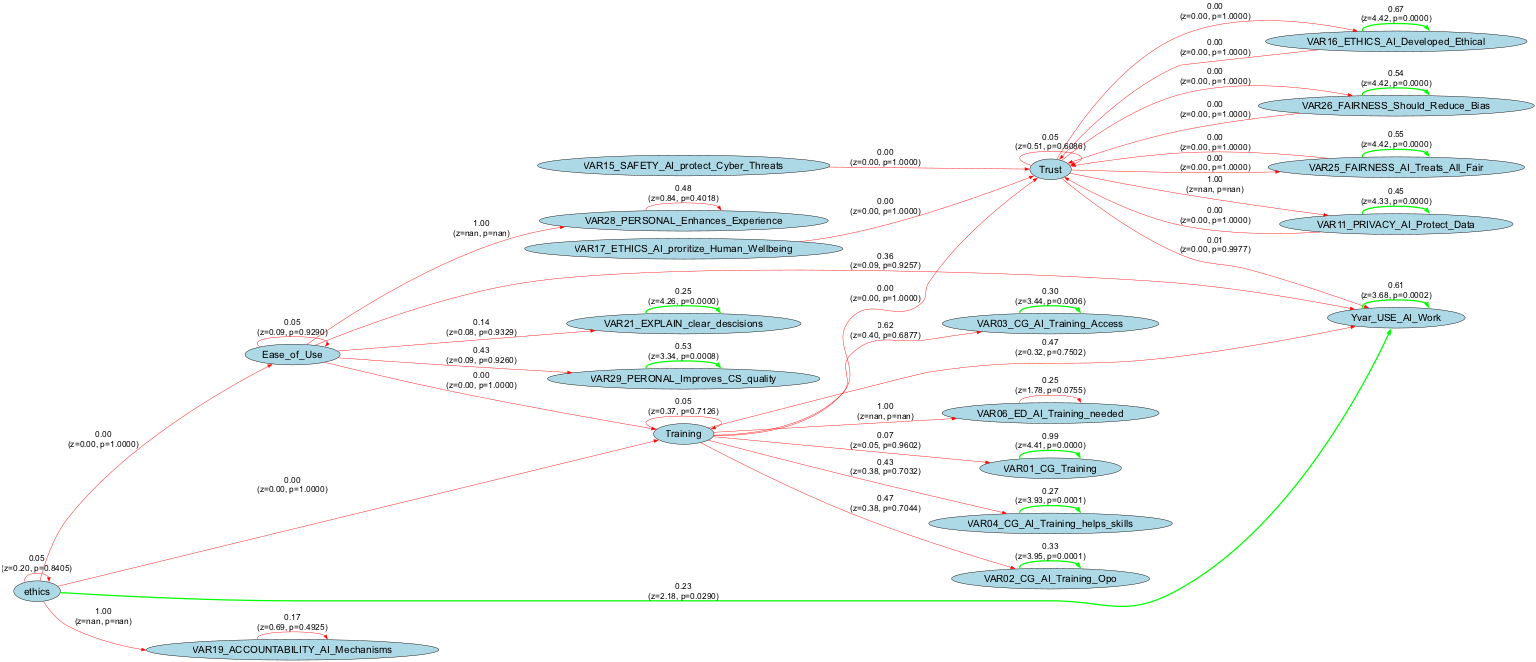

Visualization saved for segment Boomer at /Users/danramirez/mbs-structural-equation-modeling/02-charts/SEM_Visualization_Boomer.png

Processing segment: Gen Z


SEM model optimized for segment: Gen Z


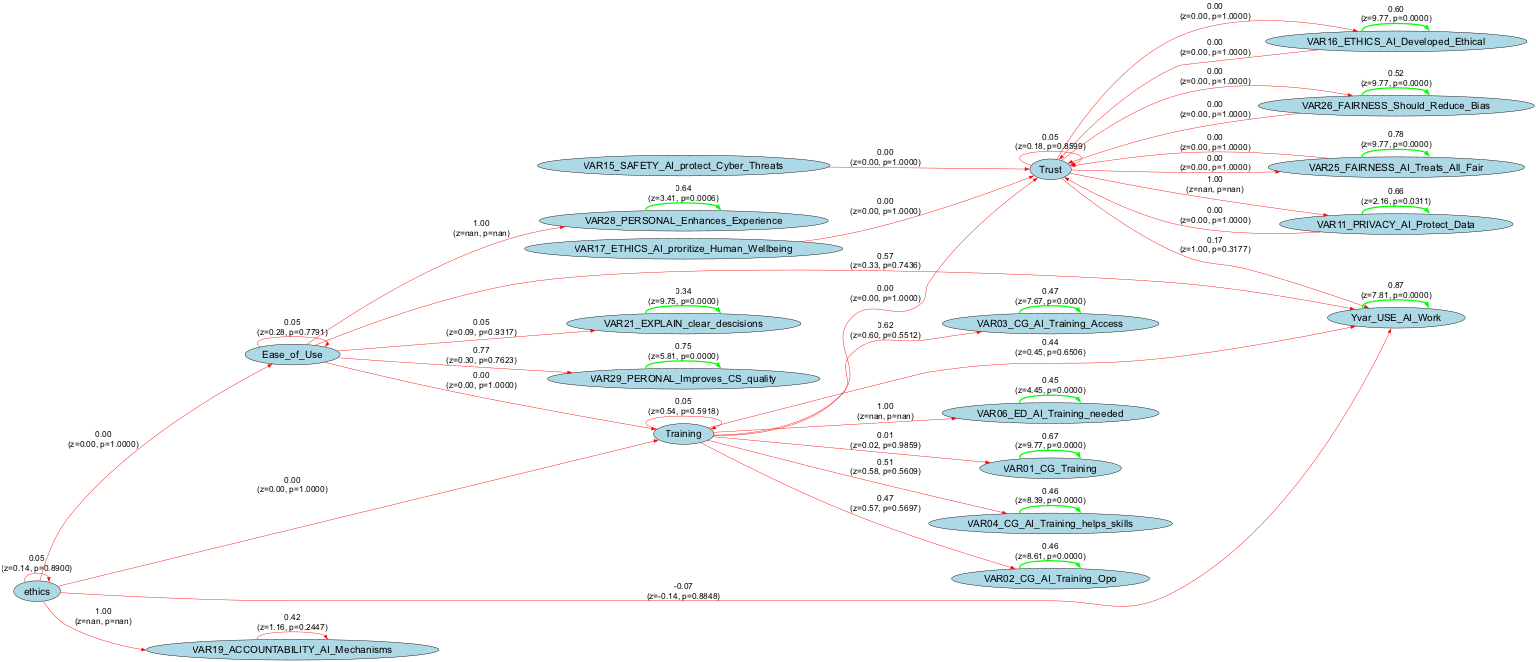

Visualization saved for segment Gen Z at /Users/danramirez/mbs-structural-equation-modeling/02-charts/SEM_Visualization_Gen Z.png

Processing segment: Gen X


SEM model optimized for segment: Gen X


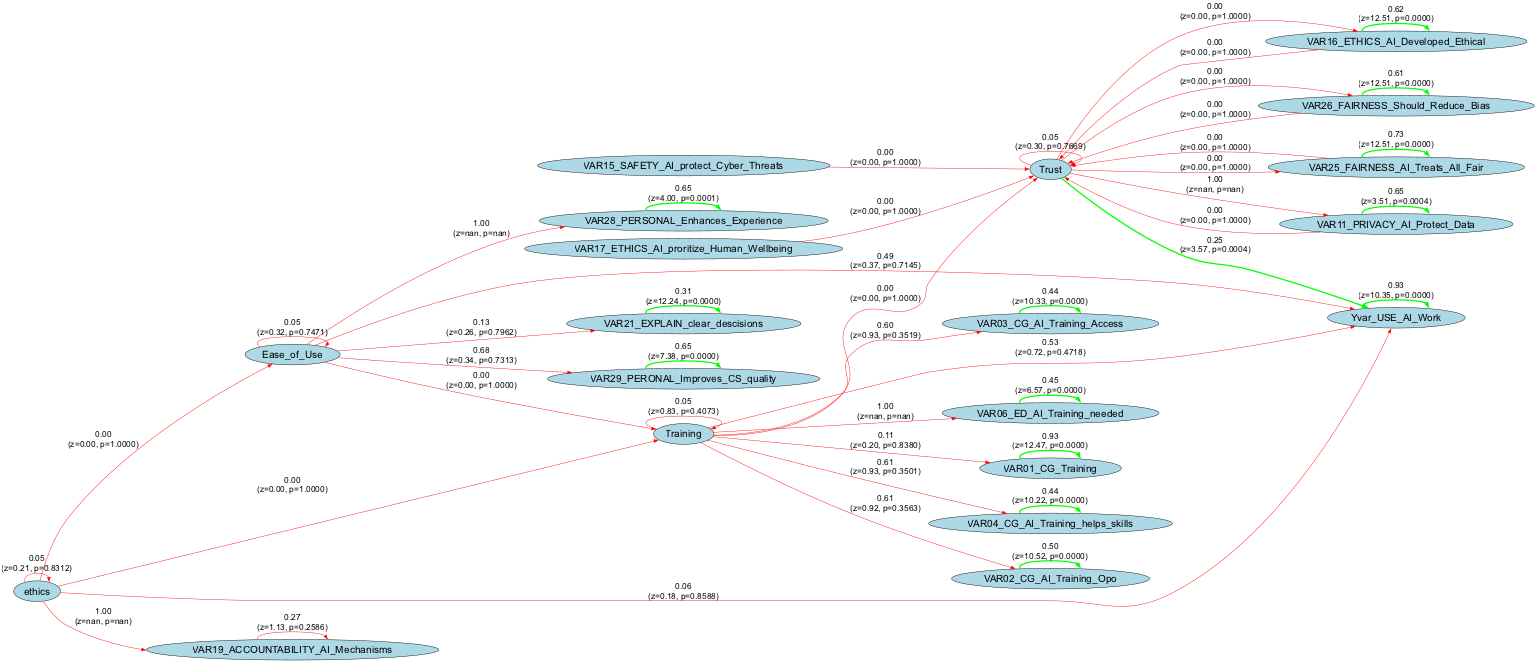

Visualization saved for segment Gen X at /Users/danramirez/mbs-structural-equation-modeling/02-charts/SEM_Visualization_Gen X.png

Processing segment: Millennial


SEM model optimized for segment: Millennial


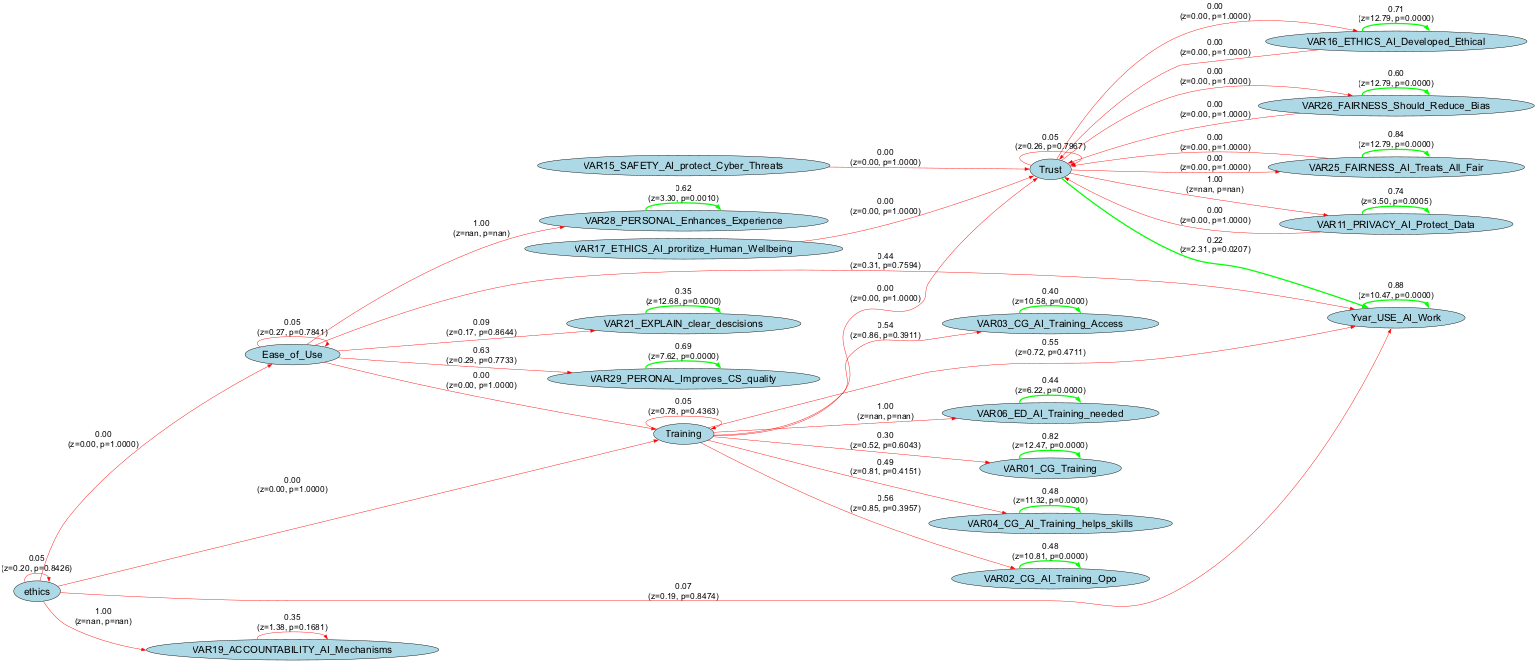

Visualization saved for segment Millennial at /Users/danramirez/mbs-structural-equation-modeling/02-charts/SEM_Visualization_Millennial.png

Hypotheses summary saved to /Users/danramirez/mbs-structural-equation-modeling/04-summary/SEM_Results.xlsx


In [3]:
import os
import pandas as pd
from package_models.sem_fx import sem_analysis

#SEM Model Description
model_desc = """
# Latent variables
Trust =~ VAR11_PRIVACY_AI_Protect_Data + VAR16_ETHICS_AI_Developed_Ethical + VAR25_FAIRNESS_AI_Treats_All_Fair + VAR26_FAIRNESS_Should_Reduce_Bias
Ease_of_Use =~ VAR28_PERSONAL_Enhances_Experience + VAR29_PERONAL_Improves_CS_quality + VAR21_EXPLAIN_clear_descisions
Training =~ VAR06_ED_AI_Training_needed + VAR03_CG_AI_Training_Access + VAR01_CG_Training + VAR04_CG_AI_Training_helps_skills+ VAR02_CG_AI_Training_Opo

ethics =~ VAR19_ACCOUNTABILITY_AI_Mechanisms

# Direct relationships with Usage (Yvar_USE_AI_Work)
Yvar_USE_AI_Work ~ Trust
Yvar_USE_AI_Work ~ Ease_of_Use
Yvar_USE_AI_Work ~ Training
Yvar_USE_AI_Work ~ ethics

# Relationships with latent variables
Trust ~ Training
Trust ~ VAR16_ETHICS_AI_Developed_Ethical
Trust ~ VAR15_SAFETY_AI_protect_Cyber_Threats
Trust ~ VAR17_ETHICS_AI_proritize_Human_Wellbeing
Trust ~ VAR11_PRIVACY_AI_Protect_Data
Trust ~ VAR25_FAIRNESS_AI_Treats_All_Fair
Trust ~ VAR26_FAIRNESS_Should_Reduce_Bias
"""

# Original Hypotheses Criteria
hypothesis_criteria = [
    ("Hypothesis 1: AI Training and Career Growth Opportunities Influence Ease of Use and Trust", 'Yvar_USE_AI_Work ~ Training'),
    ("Hypothesis 2: Explainability and Fairness Influence User Trust and AI Adoption", 'Yvar_USE_AI_Work ~ Trust'),
    ("Hypothesis 3: Ethical Development and Social Responsibility Influence User Use", 'Yvar_USE_AI_Work ~ ethics'),
    ("Hypothesis 4: AI-Driven Personalization Enhances User Experience", 'Yvar_USE_AI_Work ~ Ease_of_Use'),
    ("Hypothesis 5: AI Training Accessibility and Accountability Influence User Trust", 'Yvar_USE_AI_Work ~ Ease_of_Use')
]

# Calling the function with the original model description and hypothesis criteria
sem_analysis(model_desc, hypothesis_criteria,segment_results='Y',dependent_variable='Yvar_Work_Personal')
